# Librerias e importación de los datos

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [75]:
df = pd.read_csv("/home/jorge/DocumentsWLS/Data_Science_Projects/MLOPS-project-Credit-Card-Fraud-Detection/data/raw/train.csv")

In [76]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89345,0.978501,-0.500286,0.880803,-0.565768,-0.050344,-0.073743,0.355769,-0.180932,0.748290,...,-0.172348,-0.573966,0.099821,0.911965,-0.097430,1.600718,-0.317286,-0.047526,17344.25,0
1,105306,-0.161291,-0.122092,1.509761,-0.536157,0.215139,0.547126,0.512445,0.008466,0.261047,...,-0.033353,0.492860,-0.214347,0.501005,0.082377,-1.153493,-0.218497,0.021366,16586.21,0
2,146157,-0.430885,-0.476443,0.739370,-0.100743,1.947103,-0.349734,1.155249,-0.423903,0.459742,...,-0.242261,0.134066,-0.759366,2.298369,1.742850,-0.930799,-1.274544,0.025896,22129.87,0
3,495534,0.969095,0.289266,-0.664018,1.019932,0.728179,-0.299545,0.084722,-0.066578,-0.707878,...,-0.041331,-0.613455,-0.107819,-1.181487,0.523183,0.221261,0.353776,0.546992,5441.29,1
4,218551,1.644182,-0.317658,0.475206,0.588118,0.319660,0.854942,0.294841,-0.108429,0.240145,...,-0.195637,-0.631961,0.433749,0.808018,-0.879154,-0.965310,-0.231286,-0.152092,3357.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199015,4229,0.991923,-0.661491,0.787176,-0.975489,0.146610,1.033836,0.141423,-0.071134,0.870927,...,-0.153970,-0.169144,0.254613,-1.718766,-0.292690,-0.947023,-0.181290,-0.094190,17765.48,0
199016,274736,-0.316873,0.115376,-0.036864,-0.910714,0.154225,0.028572,0.341336,0.131374,0.376995,...,0.104529,1.201612,0.154421,1.653068,-1.238497,-0.695204,-0.409266,0.292387,7726.76,0
199017,101314,-0.563202,-1.096731,0.738785,-0.858470,-0.324984,1.305188,1.104570,-0.362140,1.272914,...,0.007088,-0.155970,0.586435,-0.326482,-1.423635,1.514874,0.007299,1.219167,19278.90,0
199018,3505,-0.835415,0.629065,1.157229,-1.425545,0.246930,0.197506,1.165638,-0.519907,3.902658,...,-0.299143,-0.031402,-0.115190,1.031082,-0.046824,-0.362531,-1.342877,-1.429347,2911.14,0


In [77]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [78]:
from sklearn.ensemble import IsolationForest

# Columnas originales
cols = [c for c in df.columns if c not in ['id', 'Class']]

# Crear Isolation Forest
iso = IsolationForest(contamination=df['Class'].mean(), random_state=42)
df['iso_score'] = -iso.fit_predict(df[cols])  #

# Graficas y distribucion de los datos

## Histogramas por columna

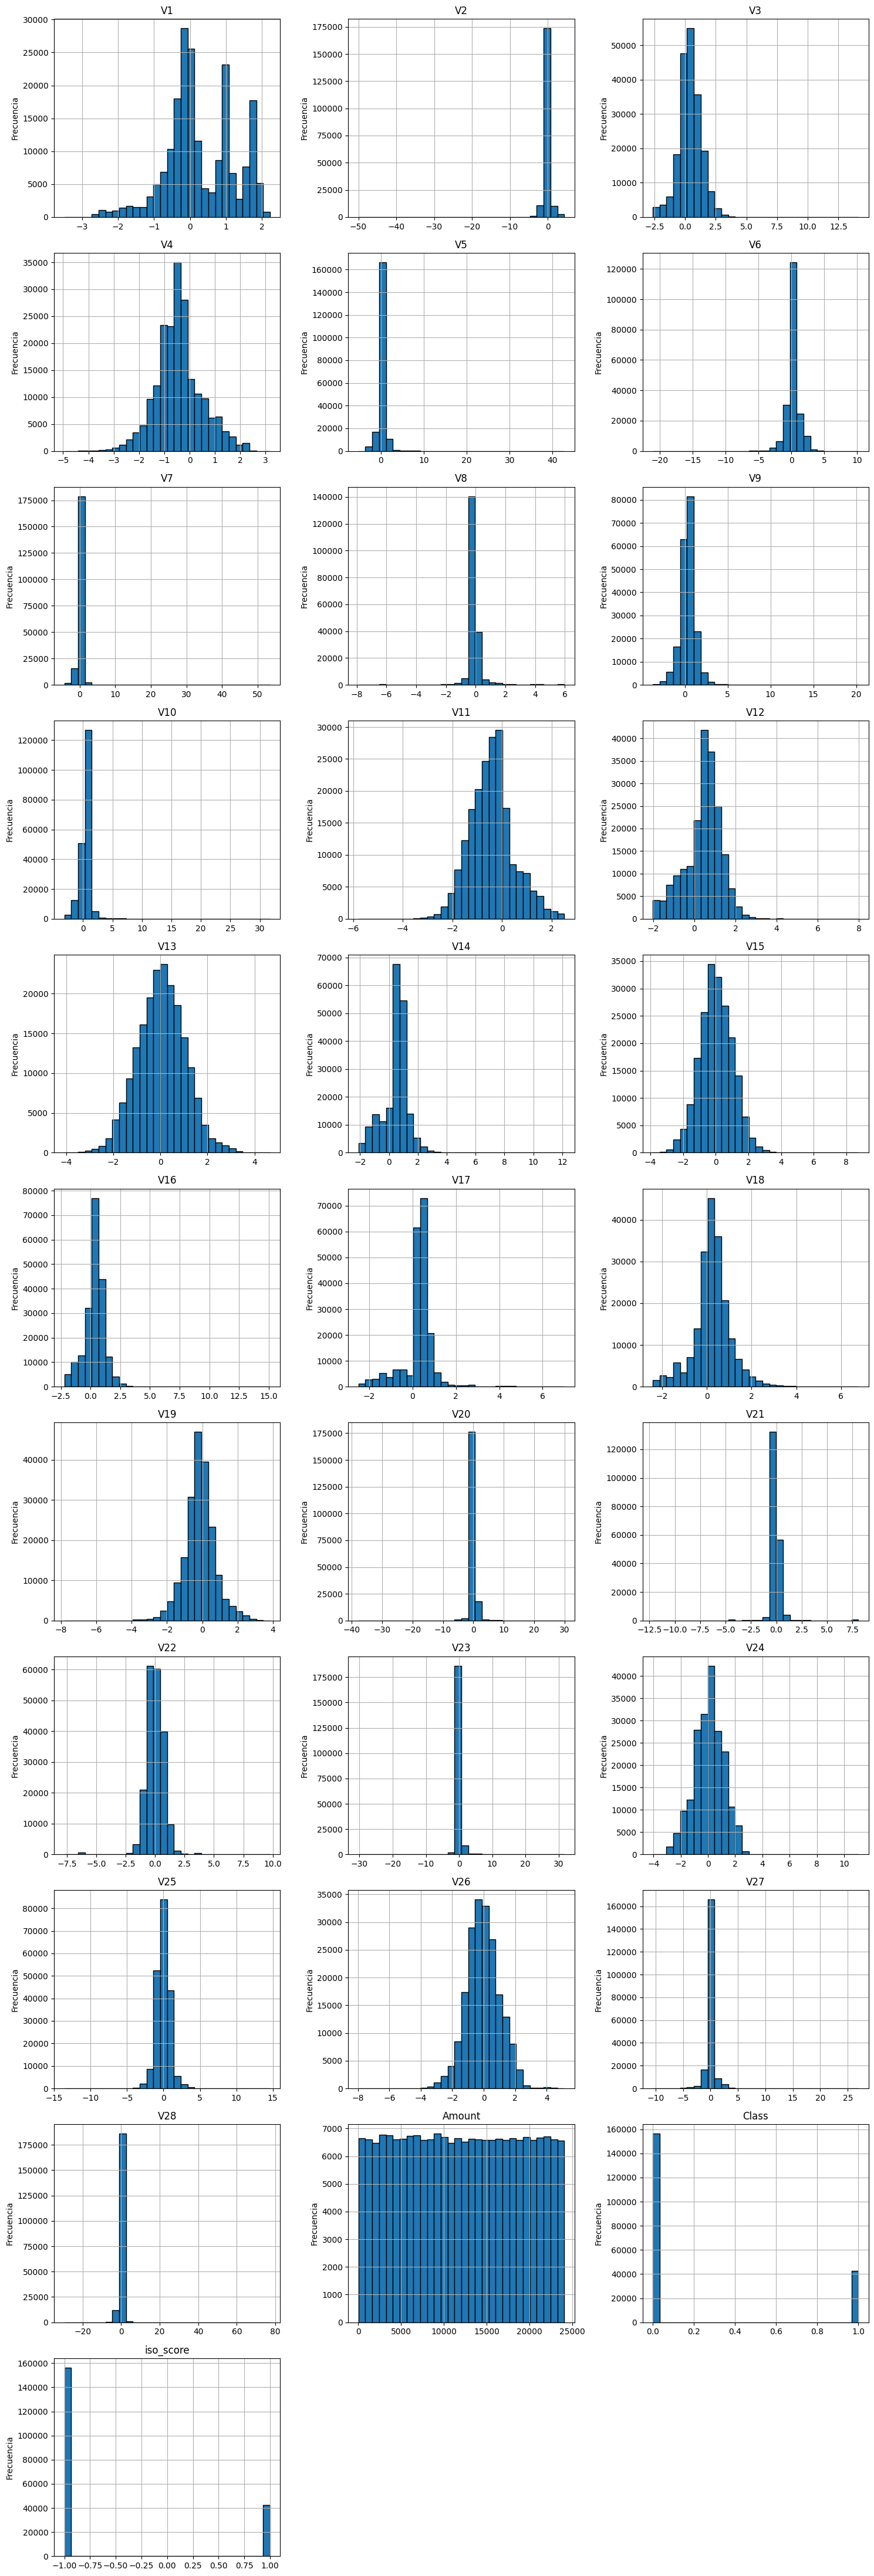

In [79]:
# Suponiendo que tu DataFrame se llama df
# Excluimos la columna 'id' si existe
cols = [col for col in df.columns if col.lower() != 'id']

# Ajustamos el tamaño del lienzo
n_cols = 3  # Número de columnas en la cuadrícula de gráficos
n_rows = -(-len(cols) // n_cols)  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia")

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Boxplots por columna

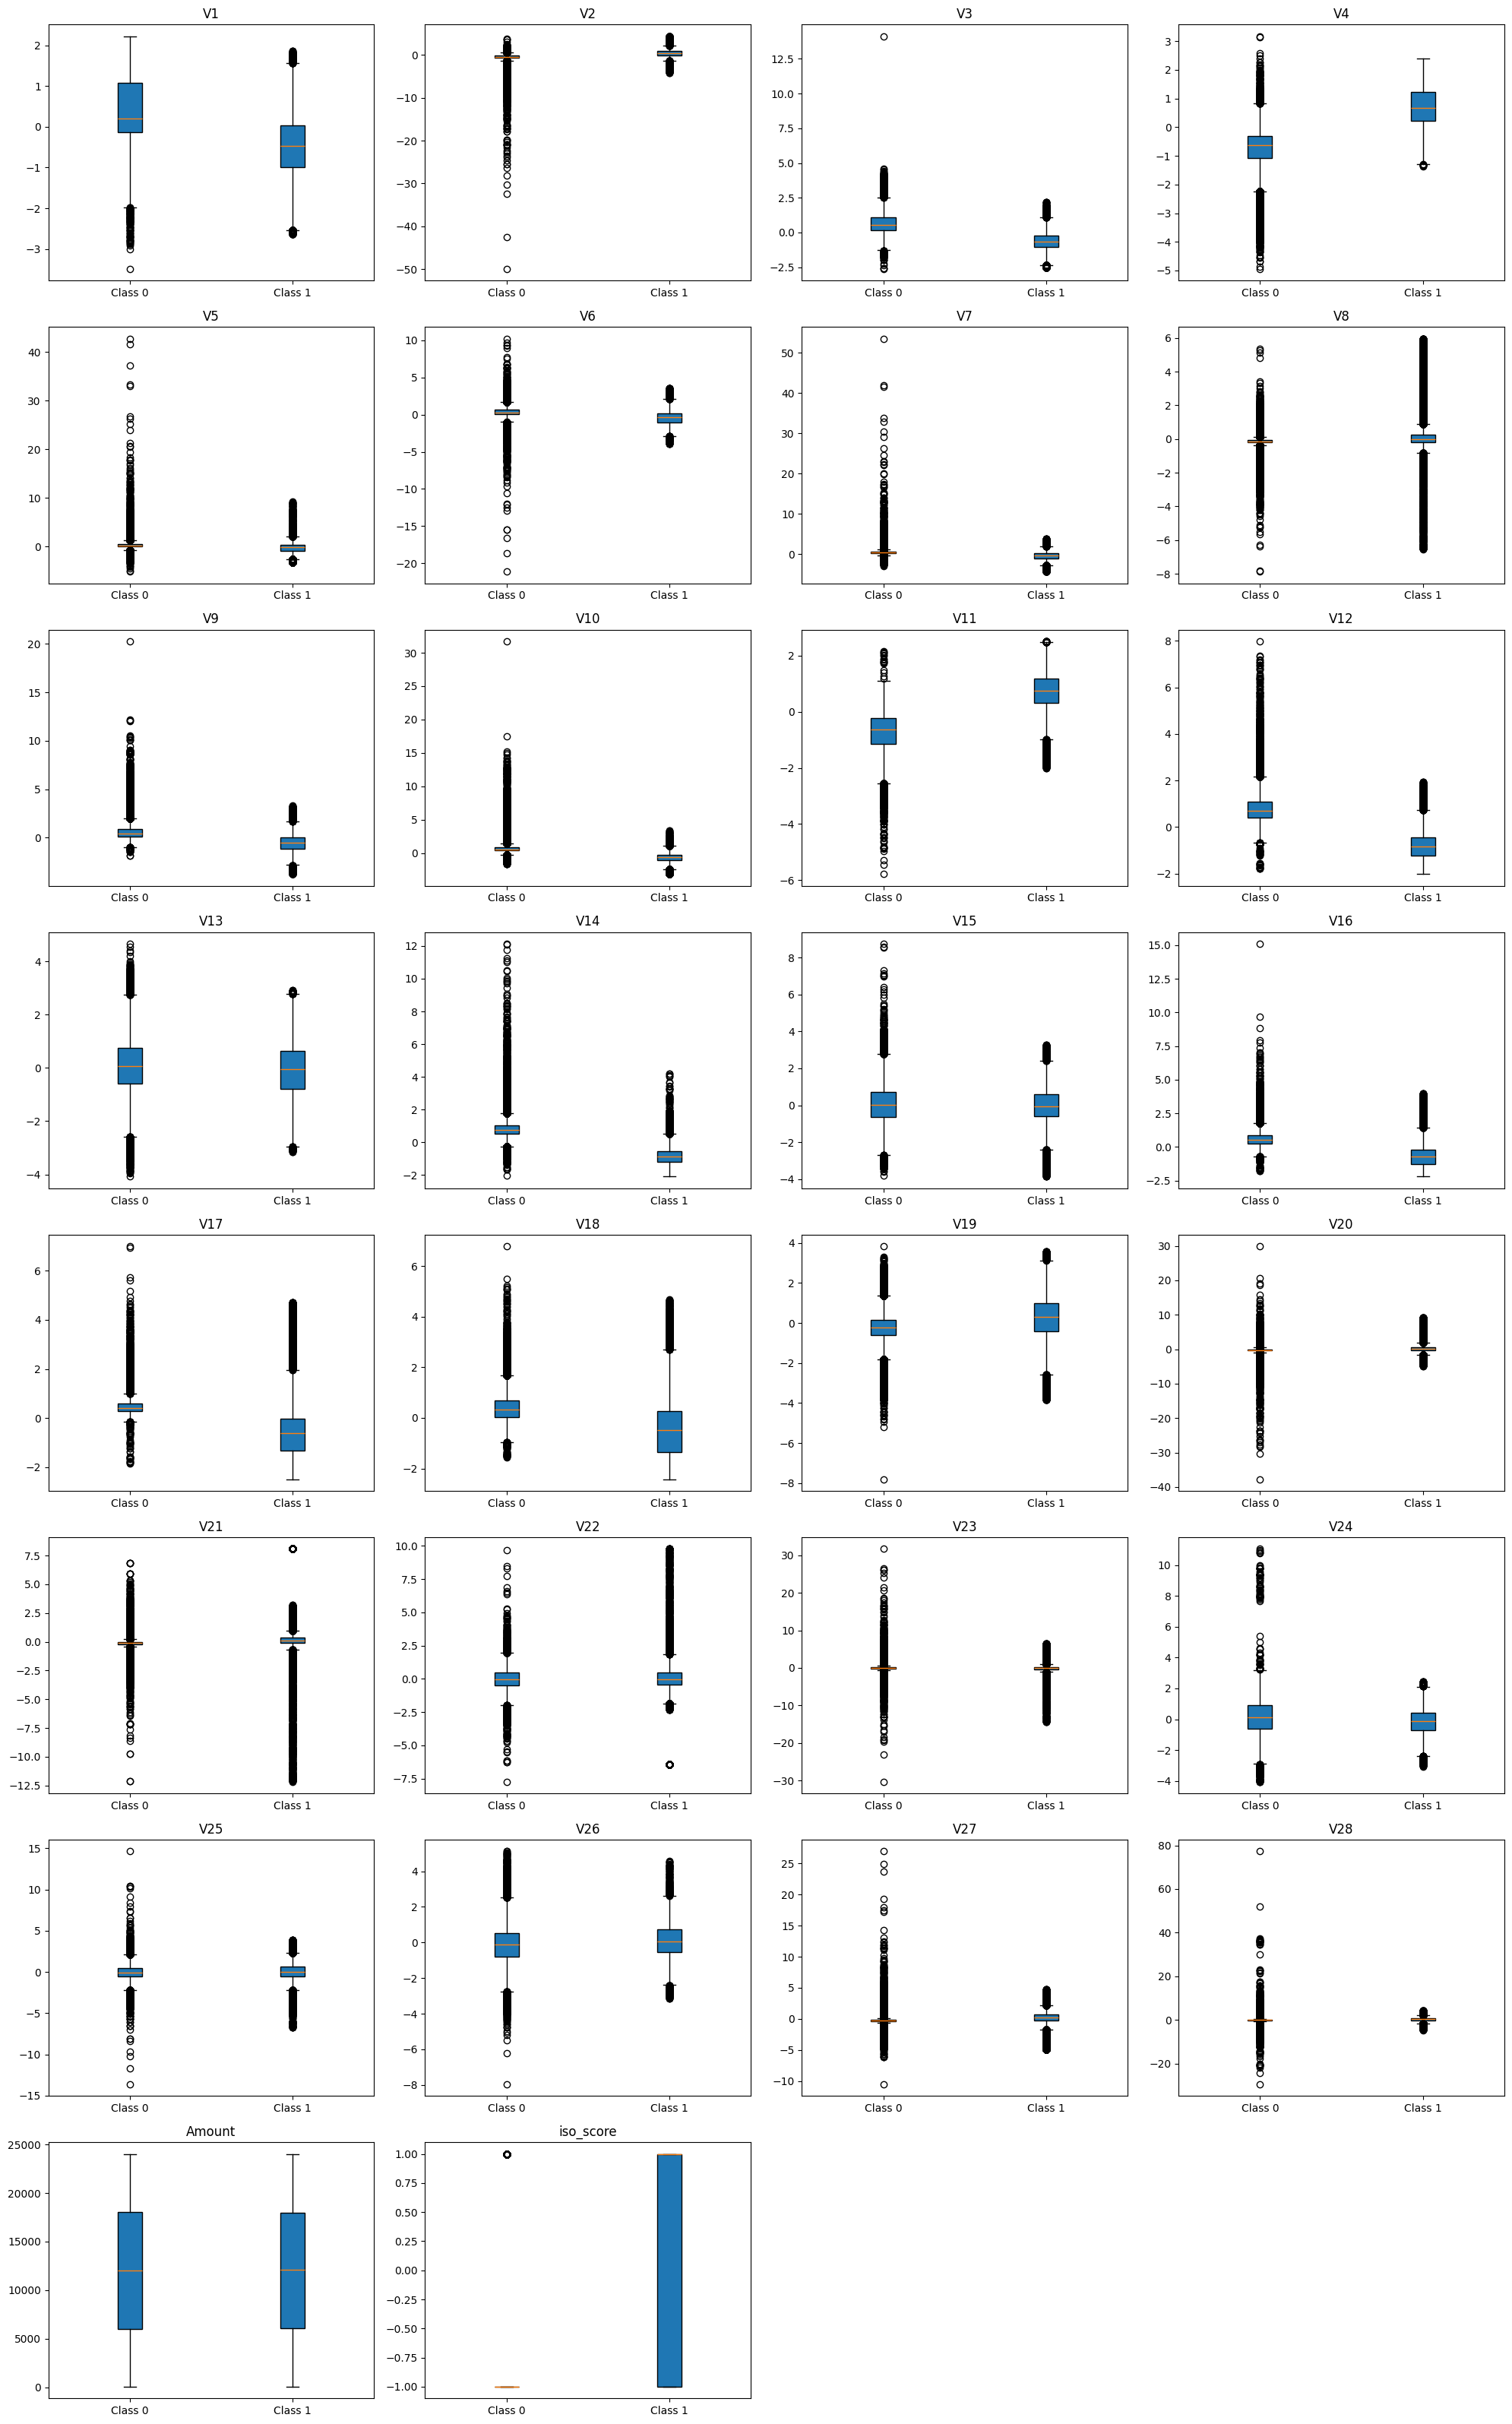

In [80]:
# Columnas a graficar (sin 'id' ni 'Class')
cols = [col for col in df.columns if col not in ['id', 'Class']]

# Configuración de subplots
n_cols = 4  # Número de columnas de gráficos
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcular filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        [df[df['Class'] == 0][col], df[df['Class'] == 1][col]],
        tick_labels=['Class 0', 'Class 1'],
        patch_artist=True
    )
    axes[i].set_title(col)

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Analysis: Class Differences

En este análisis evaluamos cómo se comportan las columnas respecto a la clase (`Class`) utilizando tres métricas:

---

1️⃣ Mann-Whitney U Test

- **Qué hace:** Compara dos muestras independientes para ver si sus distribuciones son diferentes, sin asumir normalidad.  
- **Entrada:** Valores de una columna para `Class = 0` y `Class = 1`.  
- **Salida:**  
  - `stat` → estadístico de la prueba.  
  - `p-value` → probabilidad de que las muestras provengan de la **misma distribución**.  
- **Interpretación:**  
  - `p < 0.05` → diferencias significativas entre clases.  
  - `p ≥ 0.05` → no se puede afirmar que sean diferentes.  

---

2️⃣ Mutual Information

- **Qué hace:** Mide cuánta información aporta una columna para predecir la clase.  
- **Entrada:**  
  - `X` → DataFrame de columnas.  
  - `y` → vector de clases.  
- **Salida:** Número ≥ 0 (en bits).  
- **Interpretación:**  
  - MI alta → la columna está fuertemente relacionada con la clase.  
  - MI cercana a 0 → columna poco informativa.

---

## 🔹 Resumen

- **Mann-Whitney U:** Detecta diferencias estadísticas.  
- **Mutual Information:** Indica la capacidad predictiva de cada columna respecto a la clase.

Estas métricas combinadas permiten seleccionar features que son tanto **estadísticamente distintas** como **informativas para el modelo**.


In [81]:
# Columnas a evaluar (sin 'id' ni 'Class')
cols = [c for c in df.columns if c not in ['id', 'Class']]

# Separar clases
df_major = df[df['Class'] == 0]
df_minor = df[df['Class'] == 1]

# Downsampling de la clase mayoritaria
df_major_down = df_major.sample(n=len(df_minor), random_state=42)
df_balanced = pd.concat([df_major_down, df_minor]).sample(frac=1, random_state=42)

# --- Mutual Information ---
X = df_balanced[cols]
y = df_balanced['Class']
mi = mutual_info_classif(X, y, discrete_features=False, random_state=42,n_jobs=-1)
mi_results = dict(zip(cols, mi))

# --- Mann-Whitney U ---
mw_results = {}
for col in cols:
    stat, p = mannwhitneyu(df_balanced[df_balanced['Class']==0][col],
                            df_balanced[df_balanced['Class']==1][col],
                            alternative='two-sided')
    mw_results[col] = {'p_value': p, 'Different': 'Yes' if p < 0.05 else 'No'}

# --- Combinar en DataFrame ---
summary = pd.DataFrame({
    'Mutual_Information': pd.Series(mi_results),
    'MW_p_value': pd.Series({k:v['p_value'] for k,v in mw_results.items()}),
    'MW_Different': pd.Series({k:v['Different'] for k,v in mw_results.items()})
}).sort_values(by='Mutual_Information', ascending=False)

summary


,Mutual_Information,MW_p_value,MW_Different
V14,0.509216,0.000000e+00,Yes
V17,0.457188,0.000000e+00,Yes
V10,0.451375,0.000000e+00,Yes
V12,0.438545,0.000000e+00,Yes
V4,0.420624,0.000000e+00,Yes
V11,0.410430,0.000000e+00,Yes
V3,0.363551,0.000000e+00,Yes
V16,0.357423,0.000000e+00,Yes
V7,0.300482,0.000000e+00,Yes
V2,0.281105,0.000000e+00,Yes


## Multicollinearity Analysis

La multicolinealidad en el dataset no representa un problema serio.  

- Ninguna variable tiene un **VIF** mayor a 5, lo que indica que ninguna está excesivamente correlacionada con las demás.  
- Algunas variables muestran **correlaciones moderadas** (0.5–0.7), pero estos niveles no son lo suficientemente altos como para comprometer la estabilidad de modelos lineales o la interpretación de los coeficientes.  
- Para **modelos basados en árboles**, estas correlaciones tienen un impacto mínimo en el desempeño.

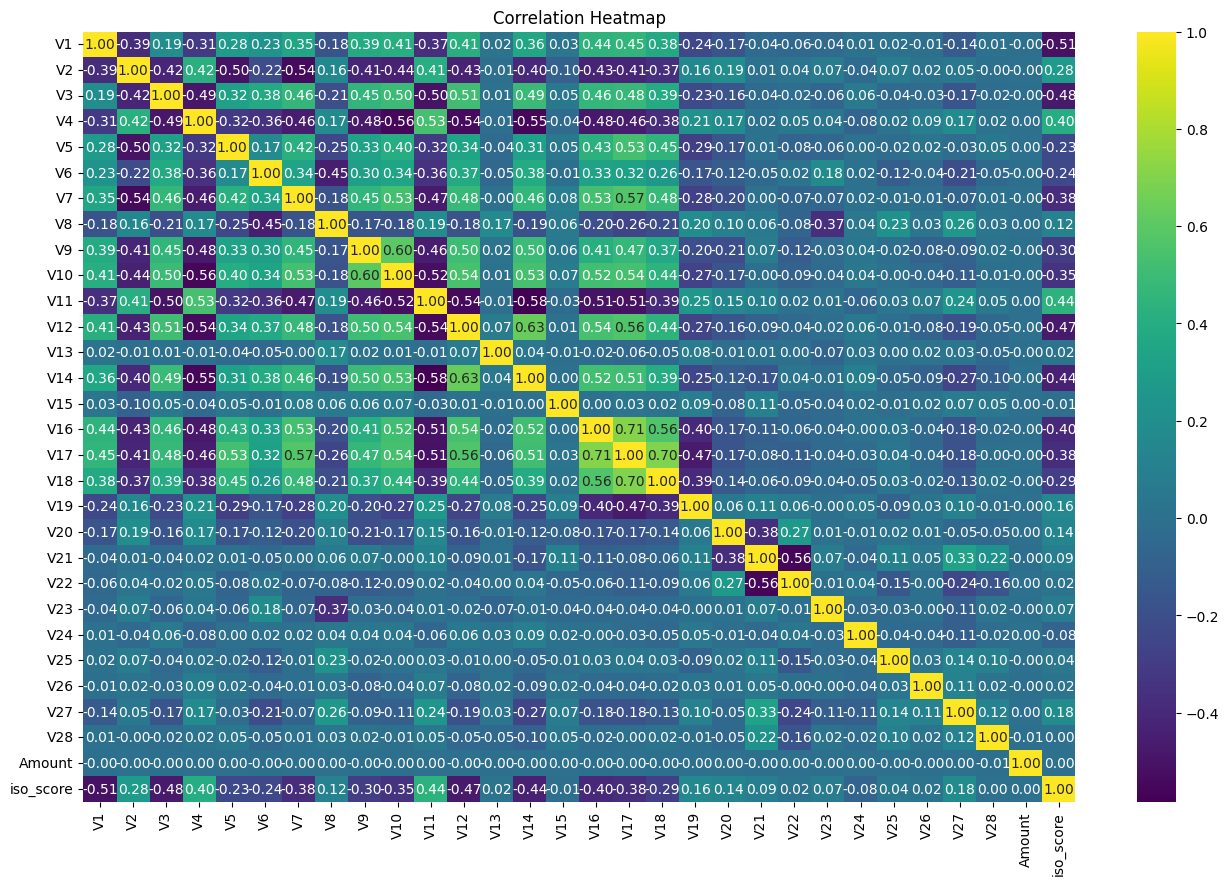

,Feature,VIF
16,V17,3.955113
13,V14,2.924239
11,V12,2.834938
15,V16,2.807922
29,iso_score,2.710661
9,V10,2.652433
2,V3,2.484457
10,V11,2.406023
3,V4,2.340689
6,V7,2.301783


In [82]:
# Columnas numéricas (sin 'id' ni 'Class')
cols = [c for c in df.columns if c not in ['id', 'Class']]
X = df[cols]

# --- Matriz de correlación ---
corr = X.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# --- VIF ---
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

Parece ser que la columna iso_score podría ser bastante importante pero la dejaremos como un posible punto a mejorar